In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.signal as  signal

from sklearn.preprocessing import StandardScaler

from tools.class_plots import Plots
from tools.class_utils import Utils

In [2]:
def plot_components(df_s, channels, issues, params = ["blue", 0.1, "INSTANTE", "GRUPO"]):

    num_channels = len(channels)  # Numero de filas en la figura
    
    # Crear figura con subgraficos (tantas filas como canales)
    fig, axes = plt.subplots(num_channels, 1, figsize=(20, 3 * num_channels), sharey = False, sharex=False)

    # Iterar sobre cada canal y graficarlo en su propio subplot
    for i, ch in enumerate(channels):
        ax = axes[i]  # Subplot correspondiente

        m = []

        for id in df_s['id'].unique():
            if id not in issues[ch]:

                s = df_s[df_s['id'] == id][ch].to_numpy(float)
                x = np.arange(len(s))/256
                ax.plot(x, s, color=params[0], alpha=params[1])

                m.append(s)
        ax.plot(x, np.mean(m, axis=0), c="white", linestyle="--", linewidth=0.5)
        # Aseguramos que la señal abarque todo el eje
        ax.set_xlim(-10, x[-1])

        ax.set_title(ch, fontsize=12)
        
        ax.set_xlabel("[s]", fontsize=12)

        # Etiquetas de cada subplot
        ax.set_ylabel(r'$[\mu V]$', fontsize=12)
        ax.grid(True)

    # Titulo general
    fig.suptitle(params[2]+": "+params[3]+" by components", fontsize=16)

    # Ajustar espacio entre subgraficos
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

    return


def combine_signals(instante, ID, grupo, ch, signals):
    dfs = [pd.DataFrame(signals[i], columns=ch[i]).assign(grupo=grupo[i], id=ID[i], instante=instante) for i in range(len(grupo))]
    return pd.concat(dfs, ignore_index=True)



In [3]:
dict_files = {"oa": ["OA/signals/PRE_SIGNALS_OA.csv", "OA/signals/POST_SIGNALS_OA.csv"],
              "oc": ["OC/signals/PRE_SIGNALS_OC.csv", "OC/signals/POST_SIGNALS_OC.csv"]}

ids_placebos = [1,4,7,9,11,13,14,15,17,18,19,24,25,27,28,31,35,40,41,42,43,44,47,48,49,50,52,61,63,65,69,105]

grupos = ["Control", "Placebo", "Exp"]

signals = {}
for oa_oc, csv in dict_files.items():

    s_pre = pd.read_csv("E:/TFM/CLUSTERING_ALL_ICA_by_segments/"+csv[0], header=0, sep=";")
    s_post = pd.read_csv("E:/TFM/CLUSTERING_ALL_ICA_by_segments/"+csv[1], header=0, sep=";")

    s_pre, s_post = Utils.reset_cols_order(s_pre, N=3), Utils.reset_cols_order(s_post, N=3)

    s_pre, s_post = Utils.rename_subjects(s_pre, ids_placebos), Utils.rename_subjects(s_post, ids_placebos)

    signals[oa_oc] = {"PRE":s_pre, "POST":s_post}

s_pre_ctrl, s_pre_plcb, s_pre_exp = Utils.group_by(signals["oa"]["PRE"], col="grupo", val = grupos)
s_post_ctrl, s_post_plcb, s_post_exp = Utils.group_by(signals["oa"]["POST"], col="grupo", val = grupos)

# Select common subjects in PRE and POST
s_pre_ctrl, s_post_ctrl = Utils.select_common_ids(s_pre_ctrl, s_post_ctrl, sort_by=["id"])
# Select common subjects in PRE and POST
s_pre_plcb, s_post_plcb = Utils.select_common_ids(s_pre_plcb, s_post_plcb, sort_by=["id"])
# Select common subjects in PRE and POST
s_pre_exp, s_post_exp = Utils.select_common_ids(s_pre_exp, s_post_exp, sort_by=["id"])

signals_oa = {"PRE":{"CTRL": s_pre_ctrl, "PLCB": s_pre_plcb, "EXP": s_pre_exp},
              "POST":{"CTRL": s_post_ctrl, "PLCB": s_post_plcb, "EXP": s_post_exp}}

s_pre_ctrl, s_pre_plcb, s_pre_exp = Utils.group_by(signals["oc"]["PRE"], col="grupo", val = grupos)
s_post_ctrl, s_post_plcb, s_post_exp = Utils.group_by(signals["oc"]["POST"], col="grupo", val = grupos)

# Select common subjects in PRE and POST
s_pre_ctrl, s_post_ctrl = Utils.select_common_ids(s_pre_ctrl, s_post_ctrl, sort_by=["id"])
# Select common subjects in PRE and POST
s_pre_plcb, s_post_plcb = Utils.select_common_ids(s_pre_plcb, s_post_plcb, sort_by=["id"])
# Select common subjects in PRE and POST
s_pre_exp, s_post_exp = Utils.select_common_ids(s_pre_exp, s_post_exp, sort_by=["id"])

signals_oc = {"PRE":{"CTRL": s_pre_ctrl, "PLCB": s_pre_plcb, "EXP": s_pre_exp},
              "POST":{"CTRL": s_post_ctrl, "PLCB": s_post_plcb, "EXP": s_post_exp}}

In [4]:
def get_Pxx(df, components):
    #mean_c_Pxx = np.zeros((len(components), 257), dtype=float)
    c_Pxx = []
    f_Pxx = []
    for i,c in enumerate(components):
        for id in df['id'].unique():
            s = df[df['id']==id][c]

            f, Pxx = signal.welch(s, fs=256, window="hann", nperseg=256*2, noverlap=256//2)

            c_Pxx.append(Pxx)
            f_Pxx.append(f)
        #m_Pxx = np.vstack(c_Pxx)

        #mean_c_Pxx[i,:] = np.mean(m_Pxx, axis=0)

    return f_Pxx,c_Pxx

## Ojos Abiertos

<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Alberto\AppData\Local\Temp\ipykernel_10564\828617171.py:24: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Potencia Espectral ($\mu V^{2} / Hz$)')


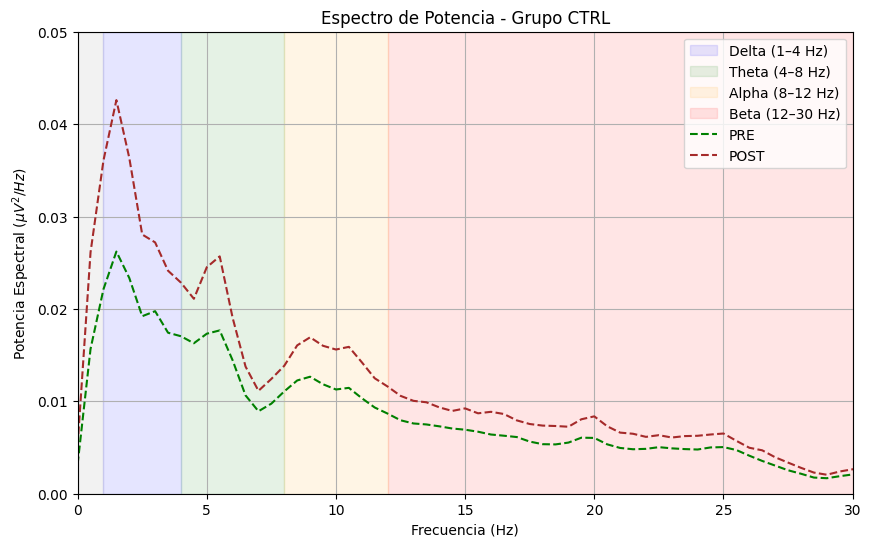

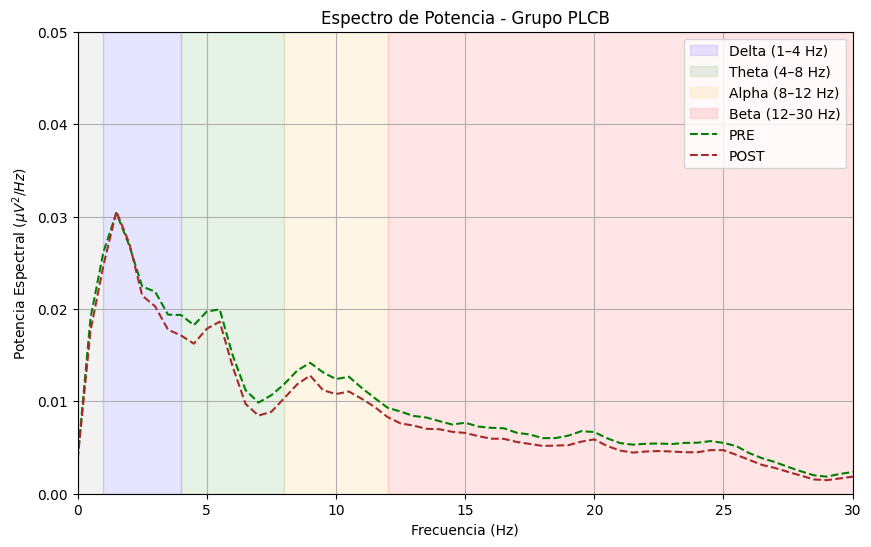

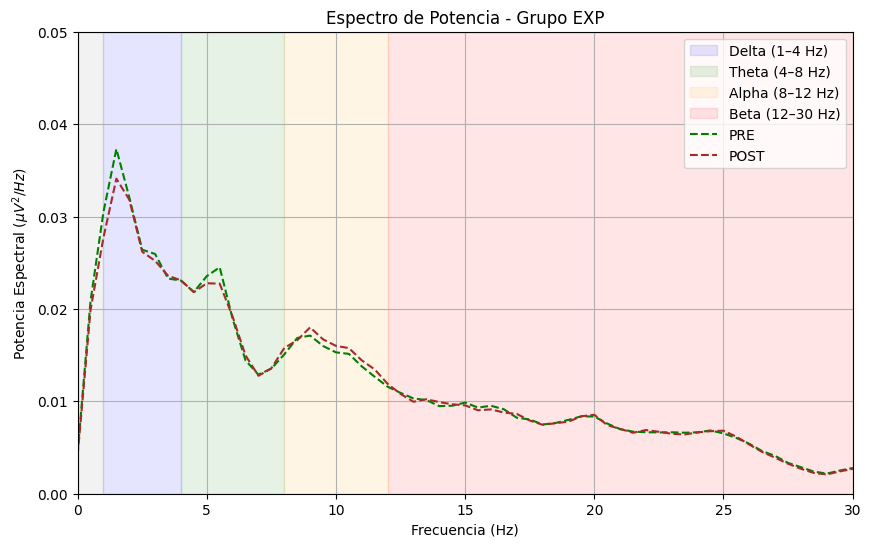

In [5]:
for g in ["CTRL", "PLCB", "EXP"]:
    f,Pxx_pre = get_Pxx(signals_oa["PRE"][g], signals_oa["PRE"][g].columns[3:])
    f,Pxx_post = get_Pxx(signals_oa["POST"][g], signals_oa["POST"][g].columns[3:])

    # Graficar la potencia espectral
    plt.figure(figsize=(10, 6))

    # Sombrear bandas de frecuencia
    plt.axvspan(0, 1, color='gray', alpha=0.1)
    plt.axvspan(1, 4, color='blue', alpha=0.1, label='Delta (1–4 Hz)')
    plt.axvspan(4, 8, color='green', alpha=0.1, label='Theta (4–8 Hz)')
    plt.axvspan(8, 12, color='orange', alpha=0.1, label='Alpha (8–12 Hz)')
    plt.axvspan(12, 30, color='red', alpha=0.1, label='Beta (12–30 Hz)')

    # Datos
    # plt.scatter(f, np.max(np.vstack([Pxx_pre_ctrl, Pxx_post_ctrl]), axis=0), c="#003366", alpha=0.3)
    # plt.plot(np.tile(f, (19*2, 1)), np.vstack([Pxx_pre_ctrl, Pxx_post_ctrl]), c="blue", alpha=0.3)
    plt.plot(f[0], np.median(Pxx_pre, axis=0), c="g", linestyle="--", label="PRE")
    plt.plot(f[0], np.median(Pxx_post, axis=0), c="brown", linestyle="--", label="POST")
    # plt.scatter(f, np.min(np.vstack([Pxx_pre_ctrl, Pxx_post_ctrl]), axis=0), c="#003366", alpha=0.3, label="Max-Min")

    # Etiquetas
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Potencia Espectral ($\mu V^{2} / Hz$)')
    plt.title('Espectro de Potencia - Grupo '+g)
    plt.grid(True)
    plt.ylim([0,0.05])
    plt.xlim([0, 30])
    plt.legend(loc="upper right")

    plt.show()

[GRUPO] Number of subjects: 21
[PRE] Shape Pxx: (399, 257)
[POST] Shape Pxx: (399, 257)

eeeee
[delta]
[PRE] Shape Density: (399, 1)
[POST] Shape Density: (399, 1)
[theta]
[PRE] Shape Density: (399, 1)
[POST] Shape Density: (399, 1)
[alpha]
[PRE] Shape Density: (399, 1)
[POST] Shape Density: (399, 1)
[beta]
[PRE] Shape Density: (399, 1)
[POST] Shape Density: (399, 1)
[GRUPO] Number of subjects: 31
[PRE] Shape Pxx: (589, 257)
[POST] Shape Pxx: (589, 257)

eeeee
[delta]
[PRE] Shape Density: (589, 1)
[POST] Shape Density: (589, 1)
[theta]
[PRE] Shape Density: (589, 1)
[POST] Shape Density: (589, 1)
[alpha]
[PRE] Shape Density: (589, 1)
[POST] Shape Density: (589, 1)
[beta]
[PRE] Shape Density: (589, 1)
[POST] Shape Density: (589, 1)
[GRUPO] Number of subjects: 34
[PRE] Shape Pxx: (646, 257)
[POST] Shape Pxx: (646, 257)

eeeee
[delta]
[PRE] Shape Density: (646, 1)
[POST] Shape Density: (646, 1)
[theta]
[PRE] Shape Density: (646, 1)
[POST] Shape Density: (646, 1)
[alpha]
[PRE] Shape Density

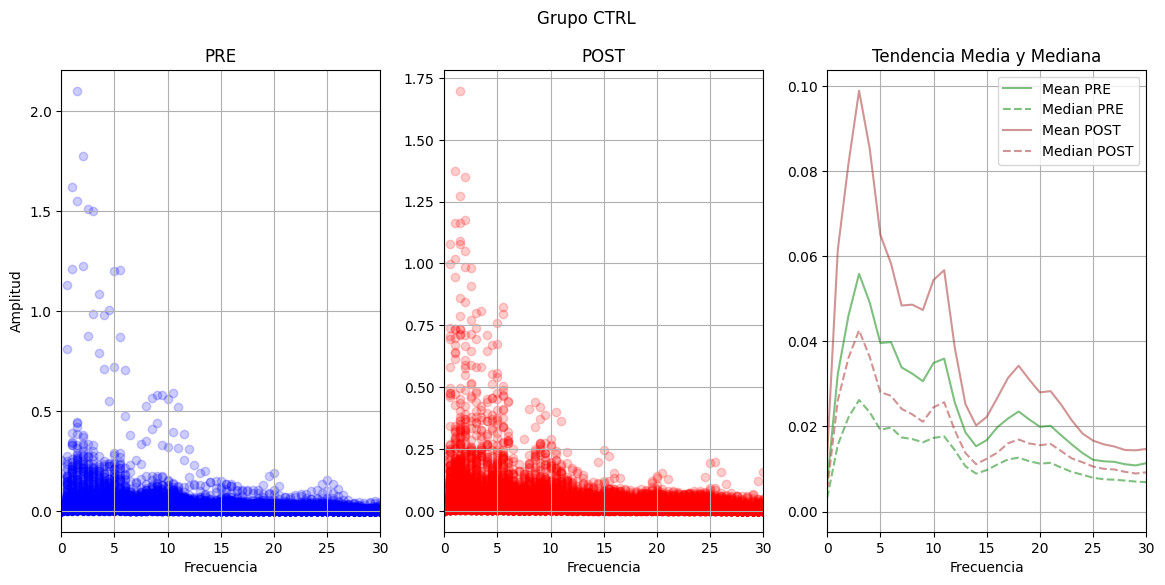

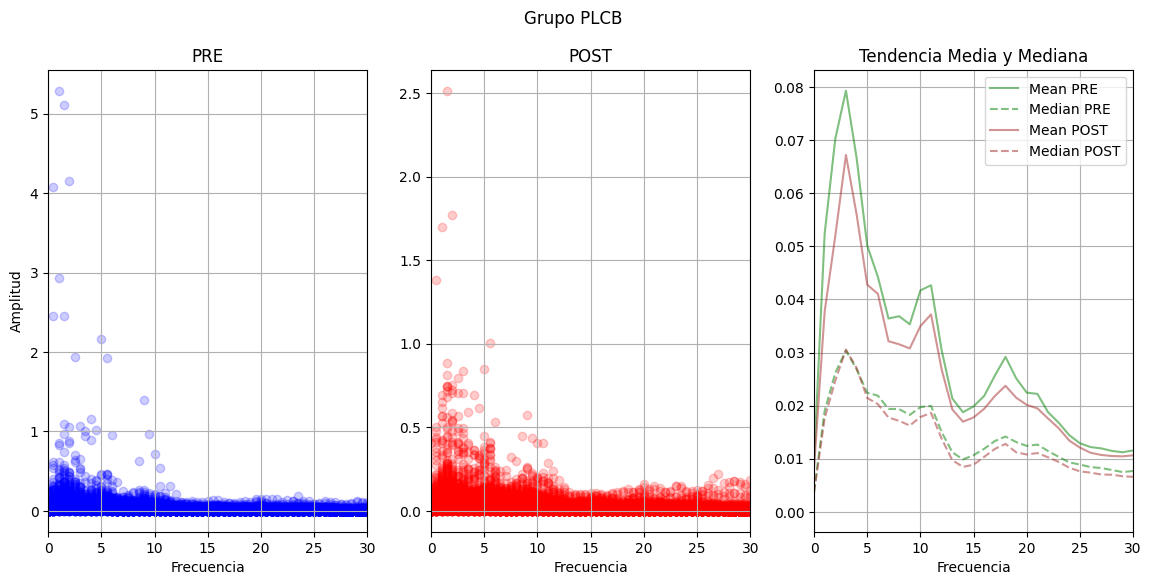

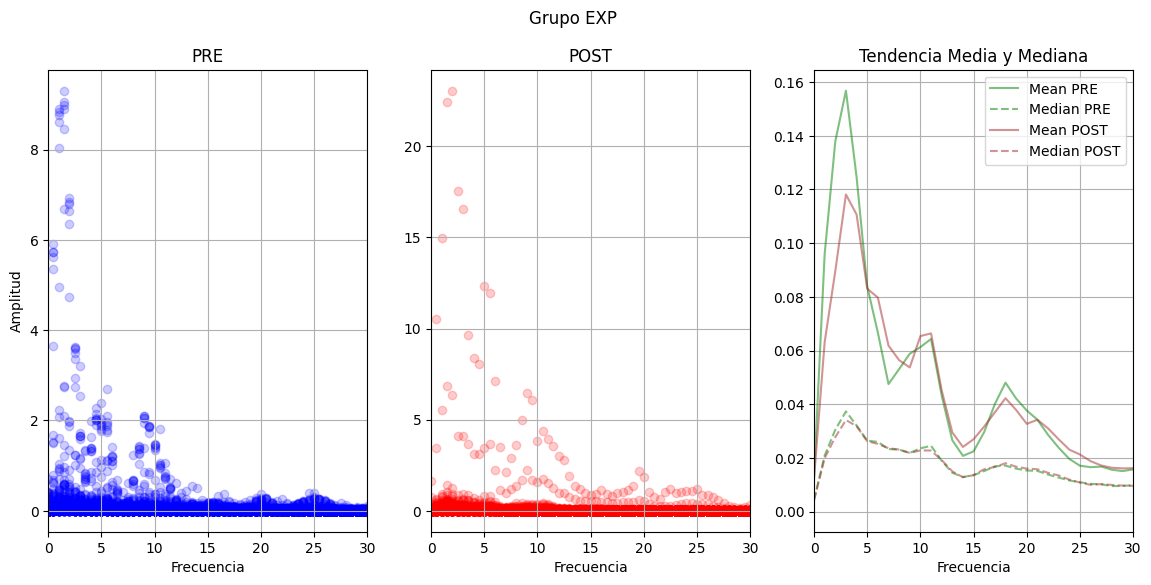

In [ ]:
bands = {"delta": [1, 4], "theta": [4, 8], "alpha": [8, 12], "beta": [12, 30]}
import matplotlib.pyplot as plt
import numpy as np

resultados = []

for g in ["CTRL", "PLCB", "EXP"]:
    f,Pxx_pre = get_Pxx(signals_oa["PRE"][g], signals_oa["PRE"][g].columns[3:])
    f,Pxx_post = get_Pxx(signals_oa["POST"][g], signals_oa["POST"][g].columns[3:])
    
    print()
    print("[GRUPO] Number of subjects:", len(signals_oa["PRE"][g]["id"].unique()))
    print("[PRE] Shape Pxx:",np.vstack(Pxx_pre).shape)
    print("[POST] Shape Pxx:",np.vstack(Pxx_post).shape)
    print()

    fig, axs = plt.subplots(1, 3, figsize=(14, 6))

    fig.suptitle("Grupo "+g)

    # --- Gráfico Pre ---
    for i, pre in enumerate(Pxx_pre):
        axs[0].scatter(f[i], pre, c="b", alpha=0.2)
    axs[0].set_title('PRE')
    axs[0].set_xlabel('Frecuencia')
    axs[0].set_ylabel('Amplitud')
    axs[0].set_xlim([0, 30])
    # axs[0].set_ylim([0, 0.5])
    axs[0].grid(True)

    # --- Gráfico Post ---
    for i, post in enumerate(Pxx_post):
        axs[1].scatter(f[i], post, c="r", alpha=0.2)
    axs[1].set_title('POST')
    axs[1].set_xlabel('Frecuencia')
    axs[1].set_xlim([0, 30])
    axs[1].grid(True)

    mu_pre = np.mean(np.vstack(Pxx_pre),axis=0)
    median_pre = np.median(np.vstack(Pxx_pre),axis=0)

    mu_post = np.mean(np.vstack(Pxx_post),axis=0)
    median_post = np.median(np.vstack(Pxx_post),axis=0)

    axs[2].plot(mu_pre, c="green", alpha=0.5, label = "Mean PRE")
    axs[2].plot(median_pre, c="green",linestyle="--", alpha=0.5, label="Median PRE")
    axs[2].plot(mu_post, c="brown", alpha=0.5, label = "Mean POST")
    axs[2].plot(median_post, c="brown",linestyle="--", alpha=0.5, label="Median POST")
    axs[2].set_title('Tendencia Media y Mediana')
    axs[2].set_xlabel('Frecuencia')
    axs[2].set_xlim([0, 30])
    axs[2].legend()
    axs[2].grid(True)

    from scipy.stats import wilcoxon
    for band, (lower,upper) in bands.items():
        
        # Seleccionamos indices del eje X con frecuencias [lower, upper]
        indices = [i for i, valor in enumerate(f[0]) if lower <= valor <= upper]

        # Calculamos la densidad para cada banda de frecuencia
        density_post = np.trapz(np.vstack(Pxx_post)[:, indices], np.vstack(f)[:, indices], axis=1)
        density_pre = np.trapz(np.vstack(Pxx_pre)[:, indices], np.vstack(f)[:, indices], axis=1)

        print("["+band+"]")
        print("[PRE] Shape Density:",np.vstack(density_pre).shape)
        print("[POST] Shape Density:",np.vstack(density_post).shape)

        # Calculamos la diferencia
        diff = density_post - density_pre

        stat, p_val = wilcoxon(diff)

        # Tamaño del efecto
        n = len(diff)
        mu_T = n * (n + 1) / 4
        sigma_T = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
        z = (stat - mu_T) / sigma_T
        r = abs(z) / np.sqrt(n)

        # Guardamos en la lista
        resultados.append({
            'Grupo': g,      # asegúrate de definir 'grupo' antes de este bloque
            'Banda': band,
            'p_valor': p_val,
            'r': r,
        })

# Convertimos a DataFrame
df_resultados_oa = pd.DataFrame(resultados)

from statsmodels.stats.multitest import multipletests

# Extraemos los p-valores
pvals = df_resultados_oa['p_valor'].values

# Ajustamos (usa el método que prefieras: 'bonferroni', 'holm', 'fdr_bh', etc.)
rechazados, pvals_ajustados, _, _ = multipletests(pvals, method='bonferroni')

# Añadimos las nuevas columnas al DataFrame
df_resultados_oa['p_valor_ajustado'] = pvals_ajustados
df_resultados_oa['rechazado'] = rechazados  # True si es significativo tras corrección

In [ ]:
df_resultados_oa

,Grupo,Banda,p_valor,r,p_valor_ajustado,rechazado
0,CTRL,delta,8.157550e-16,0.403095,9.789060e-15,True
1,CTRL,theta,5.605148e-13,0.360939,6.726178e-12,True
2,CTRL,alpha,1.524340e-11,0.337701,1.829208e-10,True
3,CTRL,beta,3.086435e-09,0.296718,3.703722e-08,True
4,PLCB,delta,6.755697e-03,0.111608,8.106836e-02,False
5,PLCB,theta,4.736304e-04,0.144019,5.683565e-03,True
6,PLCB,alpha,5.349560e-05,0.166457,6.419472e-04,True
7,PLCB,beta,2.990117e-06,0.192486,3.588140e-05,True
8,EXP,delta,6.045400e-01,0.020376,1.000000e+00,False
9,EXP,theta,1.790956e-01,0.052861,1.000000e+00,False


## Ojos Cerrados

<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Alberto\AppData\Local\Temp\ipykernel_10564\4086104135.py:24: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Potencia Espectral ($\mu V^{2} / Hz$)')


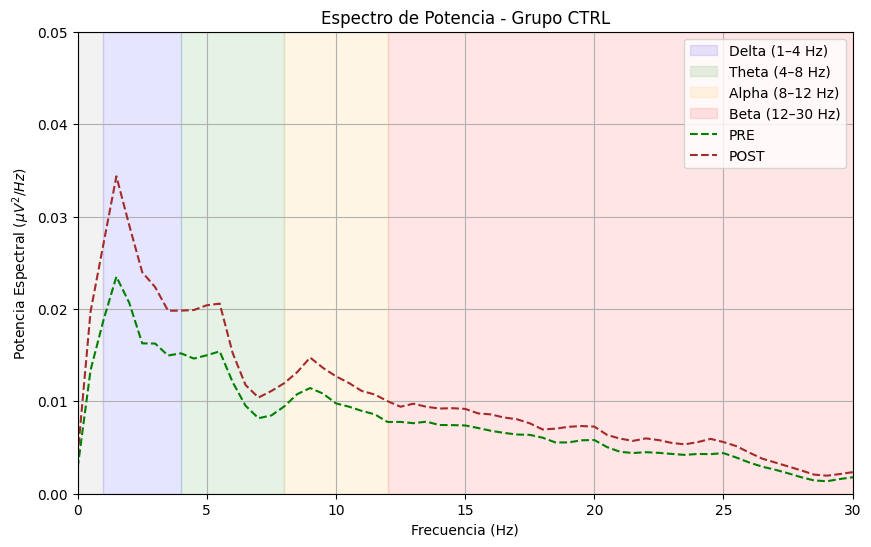

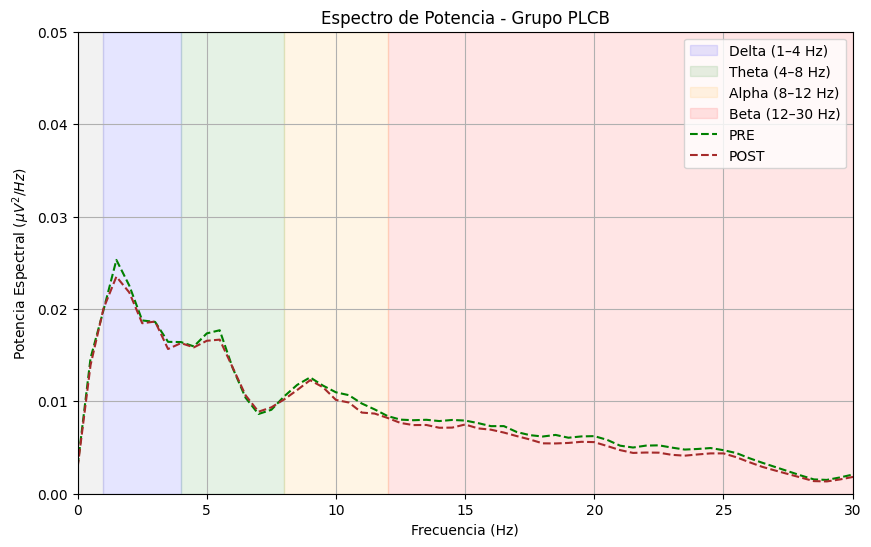

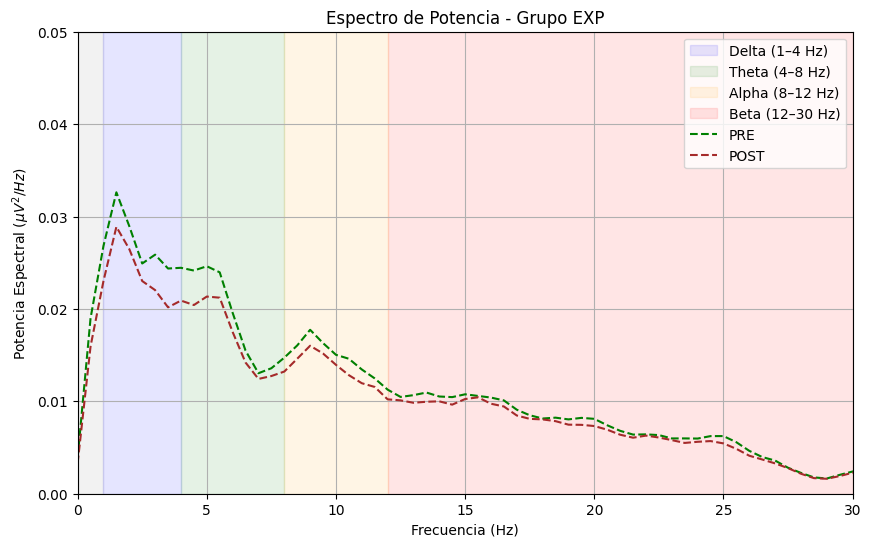

In [ ]:
for g in ["CTRL", "PLCB", "EXP"]:
    f,Pxx_pre = get_Pxx(signals_oc["PRE"][g], signals_oc["PRE"][g].columns[3:])
    f,Pxx_post = get_Pxx(signals_oc["POST"][g], signals_oc["POST"][g].columns[3:])

    # Graficar la potencia espectral
    plt.figure(figsize=(10, 6))

    # Sombrear bandas de frecuencia
    plt.axvspan(0, 1, color='gray', alpha=0.1)
    plt.axvspan(1, 4, color='blue', alpha=0.1, label='Delta (1–4 Hz)')
    plt.axvspan(4, 8, color='green', alpha=0.1, label='Theta (4–8 Hz)')
    plt.axvspan(8, 12, color='orange', alpha=0.1, label='Alpha (8–12 Hz)')
    plt.axvspan(12, 30, color='red', alpha=0.1, label='Beta (12–30 Hz)')

    # Datos
    # plt.scatter(f, np.max(np.vstack([Pxx_pre_ctrl, Pxx_post_ctrl]), axis=0), c="#003366", alpha=0.3)
    # plt.plot(np.tile(f, (19*2, 1)), np.vstack([Pxx_pre_ctrl, Pxx_post_ctrl]), c="blue", alpha=0.3)
    plt.plot(f[0], np.median(Pxx_pre, axis=0), c="g", linestyle="--", label="PRE")
    plt.plot(f[0], np.median(Pxx_post, axis=0), c="brown", linestyle="--", label="POST")
    # plt.scatter(f, np.min(np.vstack([Pxx_pre_ctrl, Pxx_post_ctrl]), axis=0), c="#003366", alpha=0.3, label="Max-Min")

    # Etiquetas
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Potencia Espectral ($\mu V^{2} / Hz$)')
    plt.title('Espectro de Potencia - Grupo '+g)
    plt.grid(True)
    plt.ylim([0,0.05])
    plt.xlim([0, 30])
    plt.legend(loc="upper right")

    plt.show()


[GRUPO] Number of subjects: 21
[PRE] Shape Pxx: (420, 257)
[POST] Shape Pxx: (420, 257)

[delta]
[PRE] Shape Density: (420, 1)
[POST] Shape Density: (420, 1)
[theta]
[PRE] Shape Density: (420, 1)
[POST] Shape Density: (420, 1)
[alpha]
[PRE] Shape Density: (420, 1)
[POST] Shape Density: (420, 1)
[beta]
[PRE] Shape Density: (420, 1)
[POST] Shape Density: (420, 1)

[GRUPO] Number of subjects: 31
[PRE] Shape Pxx: (620, 257)
[POST] Shape Pxx: (620, 257)

[delta]
[PRE] Shape Density: (620, 1)
[POST] Shape Density: (620, 1)
[theta]
[PRE] Shape Density: (620, 1)
[POST] Shape Density: (620, 1)
[alpha]
[PRE] Shape Density: (620, 1)
[POST] Shape Density: (620, 1)
[beta]
[PRE] Shape Density: (620, 1)
[POST] Shape Density: (620, 1)

[GRUPO] Number of subjects: 35
[PRE] Shape Pxx: (700, 257)
[POST] Shape Pxx: (700, 257)

[delta]
[PRE] Shape Density: (700, 1)
[POST] Shape Density: (700, 1)
[theta]
[PRE] Shape Density: (700, 1)
[POST] Shape Density: (700, 1)
[alpha]
[PRE] Shape Density: (700, 1)
[POS

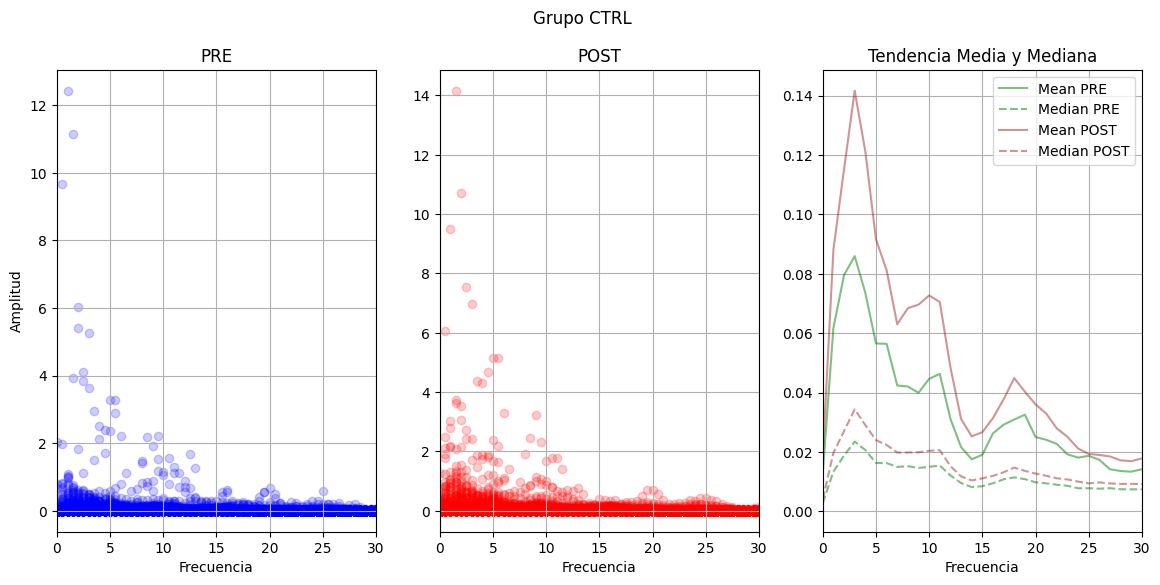

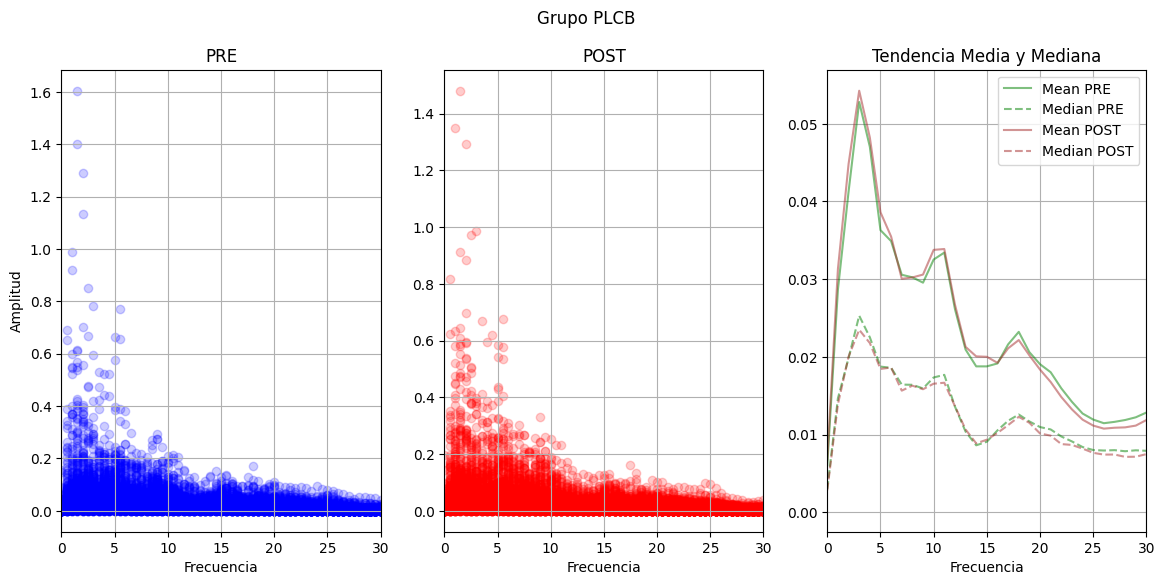

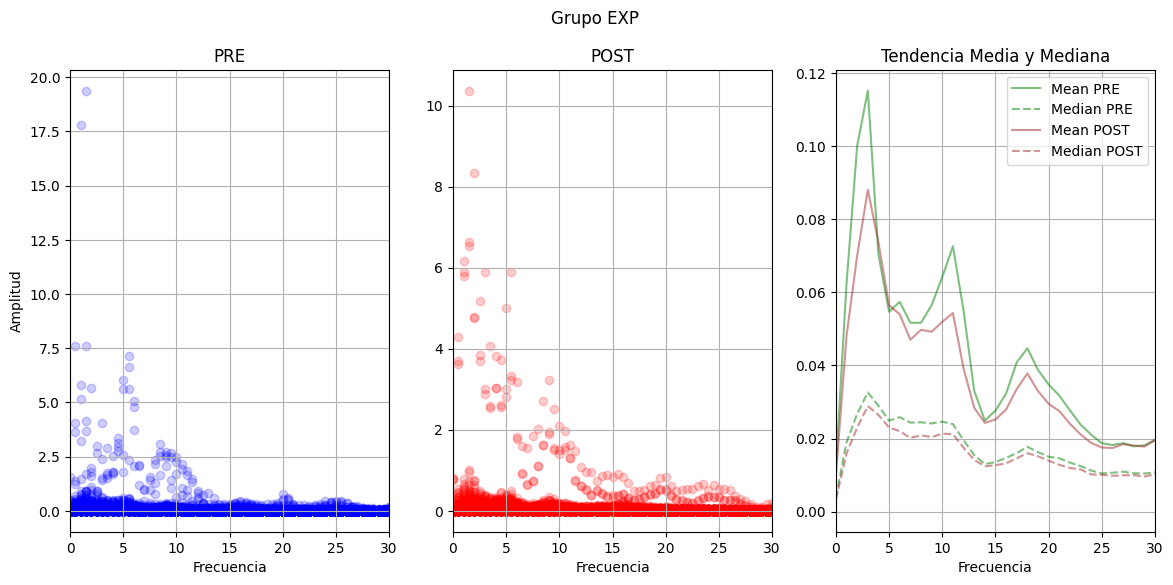

In [19]:
bands = {"delta": [1, 4], "theta": [4, 8], "alpha": [8, 12], "beta": [12, 30]}
import matplotlib.pyplot as plt
import numpy as np

resultados = []

for g in ["CTRL", "PLCB", "EXP"]:
    f,Pxx_pre = get_Pxx(signals_oc["PRE"][g], signals_oc["PRE"][g].columns[3:])
    f,Pxx_post = get_Pxx(signals_oc["POST"][g], signals_oc["POST"][g].columns[3:])

    print()
    print("[GRUPO] Number of subjects:", len(signals_oc["PRE"][g]["id"].unique()))
    print("[PRE] Shape Pxx:",np.vstack(Pxx_pre).shape)
    print("[POST] Shape Pxx:",np.vstack(Pxx_post).shape)
    print()

    fig, axs = plt.subplots(1, 3, figsize=(14, 6))

    fig.suptitle("Grupo "+g)

    # --- Gráfico Pre ---
    for i, pre in enumerate(Pxx_pre):
        axs[0].scatter(f[i], pre, c="b", alpha=0.2)
    axs[0].set_title('PRE')
    axs[0].set_xlabel('Frecuencia')
    axs[0].set_ylabel('Amplitud')
    axs[0].set_xlim([0, 30])
    # axs[0].set_ylim([0, 0.5])
    axs[0].grid(True)

    # --- Gráfico Post ---
    for i, post in enumerate(Pxx_post):
        axs[1].scatter(f[i], post, c="r", alpha=0.2)
    axs[1].set_title('POST')
    axs[1].set_xlabel('Frecuencia')
    axs[1].set_xlim([0, 30])
    axs[1].grid(True)

    mu_pre = np.mean(np.vstack(Pxx_pre),axis=0)
    median_pre = np.median(np.vstack(Pxx_pre),axis=0)

    mu_post = np.mean(np.vstack(Pxx_post),axis=0)
    median_post = np.median(np.vstack(Pxx_post),axis=0)

    axs[2].plot(mu_pre, c="green", alpha=0.5, label = "Mean PRE")
    axs[2].plot(median_pre, c="green",linestyle="--", alpha=0.5, label="Median PRE")
    axs[2].plot(mu_post, c="brown", alpha=0.5, label = "Mean POST")
    axs[2].plot(median_post, c="brown",linestyle="--", alpha=0.5, label="Median POST")
    axs[2].set_title('Tendencia Media y Mediana')
    axs[2].set_xlabel('Frecuencia')
    axs[2].set_xlim([0, 30])
    axs[2].legend()
    axs[2].grid(True)

    from scipy.stats import wilcoxon
    for band, (lower,upper) in bands.items():
        
        # Seleccionamos indices del eje X con frecuencias [lower, upper]
        indices = [i for i, valor in enumerate(f[0]) if lower <= valor <= upper]

        # Calculamos la densidad para cada banda de frecuencia
        density_post = np.trapz(np.vstack(Pxx_post)[:, indices], np.vstack(f)[:, indices], axis=1)
        density_pre = np.trapz(np.vstack(Pxx_pre)[:, indices], np.vstack(f)[:, indices], axis=1)

        print("["+band+"]")
        print("[PRE] Shape Density:",np.vstack(density_pre).shape)
        print("[POST] Shape Density:",np.vstack(density_post).shape)

        # Calculamos la diferencia
        diff = density_post - density_pre

        stat, p_val = wilcoxon(diff)

        # Tamaño del efecto
        n = len(diff)
        mu_T = n * (n + 1) / 4
        sigma_T = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
        z = (stat - mu_T) / sigma_T
        r = abs(z) / np.sqrt(n)

        # Guardamos en la lista
        resultados.append({
            'Grupo': g,      # asegúrate de definir 'grupo' antes de este bloque
            'Banda': band,
            'p_valor': p_val,
            'r': r,
        })

# Convertimos a DataFrame
df_resultados_oc = pd.DataFrame(resultados)

from statsmodels.stats.multitest import multipletests

# Extraemos los p-valores
pvals = df_resultados_oc['p_valor'].values

# Ajustamos (usa el método que prefieras: 'bonferroni', 'holm', 'fdr_bh', etc.)
rechazados, pvals_ajustados, _, _ = multipletests(pvals, method='bonferroni')

# Añadimos las nuevas columnas al DataFrame
df_resultados_oc['p_valor_ajustado'] = pvals_ajustados
df_resultados_oc['rechazado'] = rechazados  # True si es significativo tras corrección

In [20]:
df_resultados_oc

,Grupo,Banda,p_valor,r,p_valor_ajustado,rechazado
0,CTRL,delta,6.252152e-10,0.301745,7.502583e-09,True
1,CTRL,theta,1.850791e-09,0.293277,2.220950e-08,True
2,CTRL,alpha,4.591726e-08,0.266735,5.510071e-07,True
3,CTRL,beta,8.848609e-07,0.239859,1.061833e-05,True
4,PLCB,delta,5.029274e-01,0.026903,1.000000e+00,False
5,PLCB,theta,9.885559e-01,0.000576,1.000000e+00,False
6,PLCB,alpha,1.617611e-01,0.056192,1.000000e+00,False
7,PLCB,beta,9.789081e-03,0.103743,1.174690e-01,False
8,EXP,delta,1.103040e-04,0.146149,1.323648e-03,True
9,EXP,theta,1.754709e-03,0.118261,2.105651e-02,True


---------------

In [21]:
dict_issues = {ch: [] for ch in channels}

# for ch in channels:
    
#     dict_issues[ch] = list(set(list(s_post_ctrl[(s_post_ctrl[ch]<-10)]['id'].unique())) | set(list(s_post_ctrl[(s_post_ctrl[ch]>10)]['id'].unique())))  # Unión sin duplicados

plot_components(s_post_ctrl, channels, dict_issues, params = ["blue", 0.1, "POST", "CTRL"])

NameError: name 'channels' is not defined

In [ ]:
dict_issues = {ch: [] for ch in channels}

for ch in channels:
    
    dict_issues[ch] = list(set(list(s_pre_exp[(s_pre_exp[ch]<-50)]['id'].unique())) | set(list(s_pre_exp[(s_pre_exp[ch]>50)]['id'].unique())))  # Unión sin duplicados

plot_components(s_pre_exp, channels, dict_issues, params = ["red", 0.1, "PRE", "EXP"])

pp.pprint(dict_issues)

In [ ]:
dict_issues = {ch: [] for ch in channels}

for ch in channels:
    
    dict_issues[ch] = list(set(list(s_post_exp[(s_post_exp[ch]<-10)]['id'].unique())) | set(list(s_post_exp[(s_post_exp[ch]>10)]['id'].unique())))  # Unión sin duplicados

plot_components(s_post_exp, channels, dict_issues, params = ["red", 0.1, "POST", "EXP"])